In [1]:
import numpy as np
import matplotlib.pyplot as plt
from aeons.endpoint import EndModel
from aeons.utils import *
from aeons.beta import *
from aeons.plotting import plot_quantiles

In [6]:
phi = 30
R2 = np.array([[np.cos(phi), np.sin(phi)], [np.sin(phi), np.cos(phi)]])
R6 = np.zeros((6, 6))
R6[0:3, 0:3] = np.eye(3) * R2[0, 0]
R6[0:3, 3:6] = np.eye(3) * R2[0, 1]
R6[3:6, 0:3] = np.eye(3) * R2[1, 0]
R6[3:6, 3:6] = np.eye(3) * R2[1, 1]

In [41]:
from aeons.toy_samples import correlated_gaussian

d = 6
mean = np.zeros(d)
cov = np.diag([1e6, 1e6, 1e6, 1e-6, 1e-6, 1e-6])
# cov = R6 @ cov @ R6.T
bounds = [[-0.5, 0.5]] * d

In [42]:
samples = correlated_gaussian(500, mean, cov, bounds)

In [43]:
save_samples('correlated_3d', samples)

In [44]:
name, samples = get_samples('correlated_3d')
model = EndModel(samples)
true_endpoint = model.true_endpoint()
logXf_true = samples.logX().iloc[true_endpoint]

In [45]:
iterations = make_iterations(true_endpoint, 50)
logXs = samples.logX().iloc[iterations]
logXfs, d_Gs = model.inferences(get_d_G_post, iterations, Nset=50)

 Iteration 15151 of 15151, d=2.9

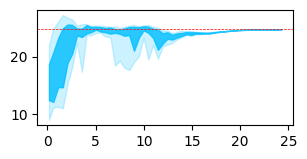

In [46]:
fig, ax = plt.subplots(figsize=(3.3, 1.5))
plot_quantiles(-logXs, -logXfs, -logXf_true, ax=ax)

In [47]:
write_to_txt(f'{data_dir}/logXfs/post/{name}.txt', [iterations, *logXfs])
write_to_txt(f'{data_dir}/d_Gs/post/{name}.txt', [iterations, *d_Gs])

# Make plots

In [34]:
figsettings()

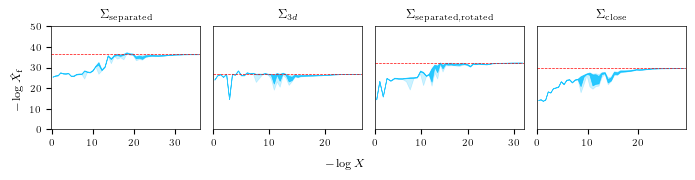

In [67]:
fig, axs = plt.subplots(1, 4, figsize=(7, 1.8))
chains = ['correlated_6d', 'correlated_3d', 'correlated_6d_rotated', 'correlated_6d_close']
titles = ['$\\Sigma_\\mathrm{{separated}}$', '$\\Sigma_{{3d}}$', '$\\Sigma_\\mathrm{{separated, rotated}}$', '$\\Sigma_\\mathrm{{close}}$']


for chain, title, ax in zip(chains, titles, axs):
    name, samples = get_samples(chain)
    model = EndModel(samples)
    true_endpoint = model.true_endpoint()
    logXf_true = samples.logX().iloc[true_endpoint]
    
    iterations, *logXfs = read_from_txt(f'{data_dir}/logXfs/post/{name}.txt')
    logXfs = np.array(logXfs)
    logXs = samples.logX().iloc[iterations]
    plot_quantiles(-logXs, -logXfs, -logXf_true, (0, 1.5), ax=ax)
    ax.set_title(title)
    ax.set_ylim(0, 50)
    ax.margins(x=0.01)

for ax in axs.flat[1:]:
    ax.set_yticks([])
    
fig.supxlabel('$-\\log X$', y=0.05)
fig.supylabel('$-\\log \\hat{{X}}_\\mathrm{{f}}$')
fig.tight_layout()

In [2]:
name, samples = get_samples('gauss_32')
model = EndModel(samples)
true_endpoint = model.true_endpoint()
logXf_true = samples.logX().iloc[true_endpoint]

In [5]:
iterations = make_iterations(true_endpoint, 50)
logXs = samples.logX().iloc[iterations]
logXfs, d_Gs = model.inferences(get_d_G_post, iterations, Nset=50)

 Iteration 52289 of 52289, d=33.0

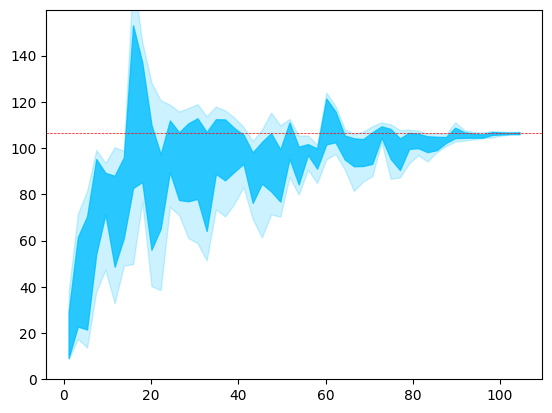

In [6]:
plot_quantiles(-logXs, -logXfs, -logXf_true, ylim=(0, 1.5))

In [73]:
write_to_txt(f'{data_dir}/logXfs/post/{name}.txt', [iterations, *logXfs])
write_to_txt(f'{data_dir}/d_Gs/post/{name}.txt', [iterations, *d_Gs])